### 1. SMS Data Exploration

SMS data is available as CSV file along with class material. In the code below, we are copying the from Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:

# read file into pandas using a relative path. Please change the path as needed
sms_df = pd.read_table("/content/drive/MyDrive/0.Latest_DS_Course/NLP/NoteBooks/data/sms.tsv", header=None, names=['label', 'message'])

In [ ]:
#Total number of SMS
sms_df.shape

In [ ]:
#Check the contents of dataframe
sms_df.sample(n=5)

In [ ]:
sms_df.loc[0, 'message']

In [ ]:
sms_df.loc[0, 'label']

In [ ]:
# Save to CSV
sms_df.to_csv('my_data.csv', index=False)
from google.colab import files

# Download the CSV file
files.download('my_data.csv')

In [ ]:
#Spam vs ham
sms_df.groupby('label').count()

In [ ]:
sms_df['label'].value_counts(normalize=True)*100

Null Accuracy - Predicting

In [ ]:
4825/5572

In [ ]:
sns.countplot(data=sms_df, x="label")

In [ ]:
#Check out SMS messages which is legitimate - ham
msg_num = np.random.randint(0, sms_df.shape[0])
print(sms_df.loc[msg_num, 'label'], ':', sms_df.loc[msg_num, 'message'])

In [ ]:
#Check out SMS messages which is a SPAM
print(sms_df.loc[1734, 'label'], ':', sms_df.loc[1734, 'message'])

In [ ]:
#Checkout missing values
sms_df.isnull().sum()

In [ ]:
# convert label to a numerical variable
sms_df['label_num'] = sms_df.label.map({'ham':0, 'spam':1})

In [ ]:
sms_df.head()

In [ ]:
#We should have label_num column in dataframe
sms_df.sample(n=15)

### 2. Create Training & Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split X and y into training and testing sets
sms_train, sms_test, y_train, y_test = train_test_split(sms_df.message, sms_df.label_num, random_state=2)

In [ ]:
#Traing data
print(sms_train.shape)
print(y_train.shape)

In [ ]:
4197/5572

In [ ]:
#Test Data
print(sms_test.shape)
print(y_test.shape)

### 3. Tokenization & Vectorization

Using **CountVectorizer**, to get numeric features.

In [ ]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()

In [ ]:
#Feed SMS data to CountVectorizer
cvect.fit(sms_train)

In [ ]:
#Check the vocablury size
len(cvect.vocabulary_)

In [ ]:
#What is there in the vocabulary
cvect.vocabulary_

In [ ]:
len(cvect.get_feature_names_out())

#Till now we created the column names or featurenames , now we will se how to convert each of our records/documents to number

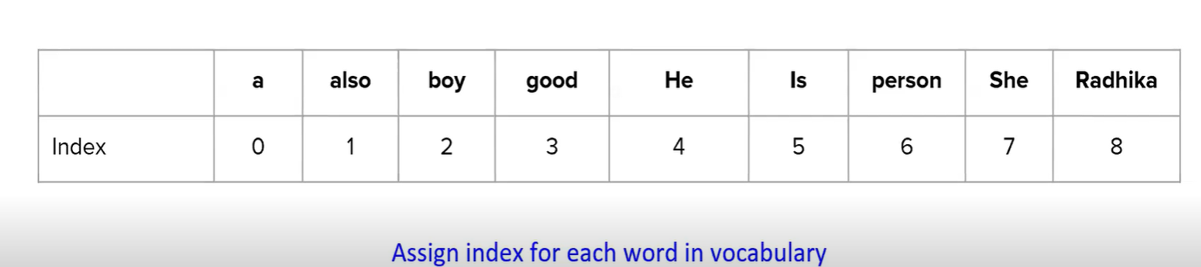

In [ ]:
# Convert the CountVectorizer matrix to a DataFrame
Xt = cvect.transform(sms_train)
df = pd.DataFrame(Xt.toarray(), columns=cvect.get_feature_names_out())

# Save the DataFrame to a CSV file
df.to_csv('vectorized_text.csv', index=False)

# If you are in Google Colab and want to download the file
from google.colab import files
files.download('vectorized_text.csv')

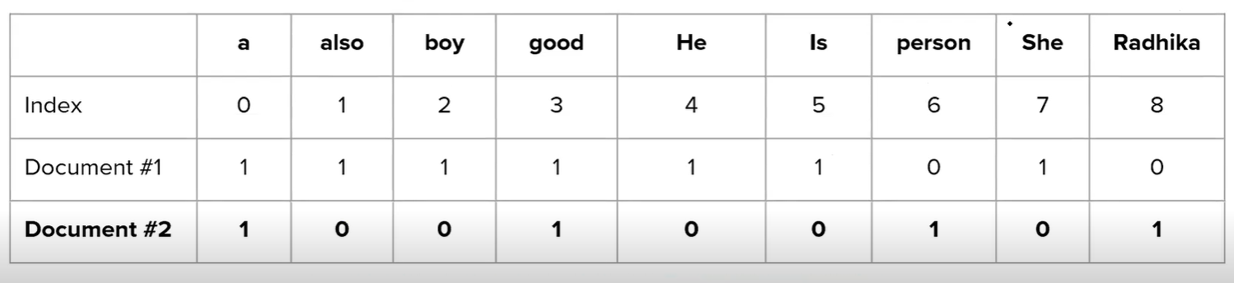

In [ ]:
print(Xt[0:1])

Build Document-term Matrix (DTM)

In [ ]:
#Convert Training SMS messages into Count Vectors
X_train_ct = cvect.transform(sms_train)

In [ ]:
#Size of Document Term Matrix
X_train_ct.shape

In [ ]:
sms_train[0]

In [ ]:
#Let's check the first record
X_train_ct[0]

In [ ]:
print(X_train_ct[1:4])

In [ ]:
# Create a dictionary with sample data
data = {
    'Column1': [1, 0, 1, 1],
    'Column2': [0, 6, 7, 8],
    'Column3': [0, 10, 11, 12],
    'Column4': [1, 14, 15, 16]
}

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

In [ ]:
df[0:1]

In [ ]:
#What's there in sparse matrix
print(X_train_ct[2000:2002])

In  a **sparse matrix** representation, where each row is represented by a **(row_index, column_index) value pair** followed by the non-zero **value** in that cell. Sparse matrices are commonly used when the majority of the elements in a matrix are zeros, and only non-zero elements are stored to save memory.

In this specific case:

1. **(0, 1559) 1** means:
   - At **row 0** and **column 1559**, the value is **1**.
   
2. **(0, 2105) 1** means:
   - At **row 0** and **column 2105**, the value is **1**.
   
3. Similarly, all other entries show non-zero values in the sparse matrix. Each number pair like **(0, 4212)** or **(1, 6039)** indicates where non-zero elements (in this case, 1's) exist in the original matrix.

In a machine learning context, this sparse matrix likely comes from something like **CountVectorizer** or **TfidfVectorizer**, which converts a corpus of text into a matrix of token counts or term frequencies. The matrix rows represent the samples (e.g., documents), and the columns represent features (e.g., individual words or n-grams).

Here, you're printing two rows (index 2000 to 2002) of your sparse matrix, and it shows the positions where there are non-zero elements. For example:
- **Row 0** (index 2000 in the original dataset) has non-zero values in columns 1559, 2105, 4212, etc.
- **Row 1** (index 2001 in the original dataset) has non-zero values in columns 4794, 5199, 6039, etc.

In summary:
- The sparse matrix shows only the indices and values of non-zero entries, which saves memory compared to storing all entries (including zeros).
- The values here are likely counts of words in documents or a similar transformation in a natural language processing task.

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

Convert Test SMS also in numerical features

In [ ]:
X_test_ct = cvect.transform(sms_test)

In [ ]:
X_test_ct.shape

### 4. Building an SMS Classifier

Let's first try K-Nearest Neigbour algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# fit the model with data (occurs in-place)
knn.fit(X_train_ct, y_train)

Evaluation on Test Dataset

In [ ]:
from sklearn import metrics

In [ ]:
#Calculate accuracy on Training Dataset
metrics.accuracy_score(y_train, knn.predict(X_train_ct))

In [ ]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, knn.predict(X_test_ct))

We can build Classifier using other algorithms e.g SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
#Train an SVM with default parameters
svc = SVC()
svc.fit(X_train_ct, y_train)

In [ ]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, svc.predict(X_test_ct))

#Now how can we predict new sms using these models

In [ ]:
# New SMS message
# new_sms = "Hi, Hru?"
# new_sms = "dont miss!! Hello mam you have won a BMW car for free. Please call our customer care"
new_sms = "Please call our customer service representative on 0800 169 6031  WHO ARE YOU SEEING?"
# Preprocess the new SMS message using the same vectorizer used for training
new_sms_transformed = cvect.transform([new_sms])

# Predict using KNN model
knn_prediction = knn.predict(new_sms_transformed)
print(knn_prediction)
# Predict using SVM model
svm_prediction = svc.predict(new_sms_transformed)

# Map prediction values back to labels
prediction_mapping = {0: 'ham', 1: 'spam'}
knn_predicted_label = prediction_mapping[knn_prediction[0]]
svm_predicted_label = prediction_mapping[svm_prediction[0]]

print("KNN Prediction:", knn_predicted_label)
print("SVM Prediction:", svm_predicted_label)


### 5. Using TF-IDF Vectorizer

In [ ]:
# import and instantiate TF-IDF Vectorizer (with the default parameters)
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [ ]:
#Feed SMS data to CountVectorizer
tvect.fit(sms_train)

#Check the vocablury size
len(tvect.vocabulary_)

In [ ]:
tvect.vocabulary_

In [ ]:
#Convert Training SMS messages into numerical values
X_train_tfidf = tvect.transform(sms_train)

X_train_tfidf.shape

In [ ]:
#Check first example
print(X_train_tfidf[0])

In [ ]:
#Convert Test SMSes also to tf-idf vectors
X_test_tfidf = tvect.transform(sms_test)

Build an SVM

In [ ]:
svc_tf = SVC()
svc_tf.fit(X_train_tfidf, y_train)

In [ ]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, svc_tf.predict(X_test_tfidf))

### 6. TF-IDF with ngram

In [ ]:
#Use ngrams of length upto 2 words
tvect_ngram = TfidfVectorizer(ngram_range=(1,2)) #Tokens can be made of 1 word or 2 words

In [ ]:
#Feed SMS data to CountVectorizer
tvect_ngram.fit(sms_train)

#Check the vocablury size
len(tvect_ngram.vocabulary_)

The movie was awesome

Words as tokens = "The", "movie", "was", awesome"

ngrams (1,2) -> "The", "movie", "was", awesome", "The movie", "movie was", "was awesome"

In [ ]:
tvect_ngram.vocabulary_

In [ ]:
len(tvect_ngram.vocabulary_)

In [ ]:
#Convert Training SMS messages into numerical values
X_train_tfidf_ngram = tvect_ngram.transform(sms_train)

X_train_tfidf_ngram.shape

In [ ]:
svc_tf = SVC()
svc_tf.fit(X_train_tfidf_ngram, y_train)

In [ ]:
#Calculate accuracy on Test Dataset
metrics.accuracy_score(y_test, svc_tf.predict(tvect_ngram.transform(sms_test)))

**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data and **ignores tokens** it hasn't seen before

### 7. Building a Deep Learning Model

In [ ]:
import tensorflow as tf

We will use CountVectorizer features in this case. This can be replaced by TF-IDF features

In [ ]:
#Start building a Keras Sequential Model
tf.keras.backend.clear_session()
model = tf.keras.Sequential()

In [ ]:
#Add hidden layers
model.add(tf.keras.layers.Dense(100, activation='relu', input_shape=(len(tvect.vocabulary_),)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))

#Add Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
X_train_ct.todense()[0]

In [ ]:
print(X_train_ct[0])

In [ ]:
model.fit(X_train_ct.todense(), y_train,
           validation_data=(X_test_ct.todense(), y_test),
           epochs=10, batch_size=32)

### 8. Controlling Vocabulary size

Thus far, we have been using the default parameters of [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [ ]:
# show default parameters for CountVectorizer (TFIDF will have similar parameters)
cvect

However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

- **stop_words:** string {'english'}, list, or None (default)
    - If 'english', a built-in stop word list for English is used.
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
    - If None, no stop words will be used.

In [ ]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
vect.fit(sms_train)
len(vect.get_feature_names_out())

- **ngram_range:** tuple (min_n, max_n), default=(1, 1)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted.
    - All values of n such that min_n <= n <= max_n will be used.

In [ ]:
# include 1-grams, 2-grams and 3-grams
vect = CountVectorizer(ngram_range=(1, 3))
vect.fit(sms_train)
len(vect.get_feature_names_out())

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [ ]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)
vect.fit(sms_train)
len(vect.get_feature_names_out())

- **min_df:** int, default=1


> Defines, at a minimum, how many documents a word should appear before it is included in Vocablury


In [ ]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)
vect.fit(sms_train)
len(vect.get_feature_names_out())

In [ ]:
vect.get_feature_names_out()

- **max_features**: int or None, default=None


> Maximum size of vocabulary. None means no hard limit.




In [ ]:
# only keep terms that appear in at least 2 documents, but maximum vocablury is restricted to 2000 words
vect = CountVectorizer(min_df=2, max_features=2000)
vect.fit(sms_train)
len(vect.get_feature_names_out())

**Guidelines for tuning Vectorizer:**

- Use your knowledge of the **problem** and the **text**
- **Experiment**, and let the data tell you the best approach!
- Quiet often, number of features are limited by amount of RAM/Compute available.

### Word Cloud

In [ ]:
import matplotlib.pyplot as plt # visualization
from wordcloud import WordCloud

In [ ]:
# Define wordcloud function from wordcloud library.
wc = WordCloud()
wc.generate(str(sms_df['message']))
# declare our figure
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in SMS dataset", fontsize=40, color='white')
plt.imshow(wc)
plt.show()